# Confusion Matrix using scikit-learn in Python

In [1]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#importing dataset
import pandas as pd
data=pd.read_excel('Activity-2-Part_1-SupportedDatset.xlsx')

In [3]:
data

,Actual Category,Predicted Category
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
5,1,1
6,0,1
7,0,0
8,0,0
9,0,1


In [4]:
# confusion matrix

matrix = confusion_matrix(data['Actual Category'],data['Predicted Category'],labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[17  9]
 [15  9]]


In [5]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(data['Actual Category'],data['Predicted Category'],labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 17 9 15 9


In [6]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(data['Actual Category'],data['Predicted Category'],labels=[1,0])
print('Classification report : \n',matrix)


Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.65      0.59        26
           0       0.50      0.38      0.43        24

    accuracy                           0.52        50
   macro avg       0.52      0.51      0.51        50
weighted avg       0.52      0.52      0.51        50



#  AUC-ROC Curve in Python

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [8]:
#importing dataset
import pandas as pd
data_roc=pd.read_csv('pima-indians-diabetes.csv')

In [9]:
data_roc

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [10]:
x=pd.DataFrame(data_roc.iloc[:,:-1])
y=pd.DataFrame(data_roc.iloc[:,-1])


In [11]:
# split into train-test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)


In [12]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [13]:
# logistic regression
model1 = LogisticRegression(solver='liblinear')
# knn
model2 = KNeighborsClassifier(n_neighbors=4)


In [14]:
# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

C:\Users\LEELA\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-14-f547f0bfe4f3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model2.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [15]:
# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)


In [16]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)


In [17]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [18]:
from sklearn.metrics import roc_auc_score
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score1, auc_score2)


0.8145900137425561 0.7737059092991296


# Plottiong ROC curve 

In [19]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

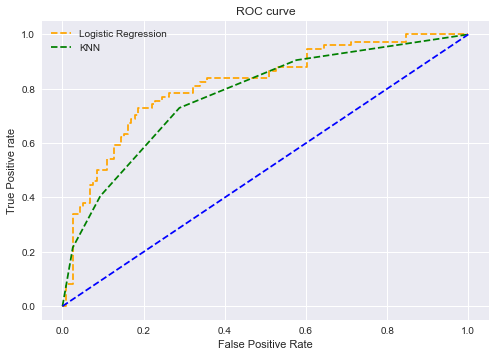

In [20]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


# The ROC curve for multi-class classification models

In [21]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [22]:
#Read data
dataset = pd.read_csv('seeds_dataset.txt', delimiter = "\t",error_bad_lines=False)
dataset

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
193,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
194,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
195,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
196,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [23]:
x=pd.DataFrame(dataset.iloc[:,:-1])
y=pd.DataFrame(dataset.iloc[:,-1])

In [24]:
# split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.28, random_state=42)


In [25]:
# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

In [26]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 3
for i in range(n_class): 
 fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

C:\Users\LEELA\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


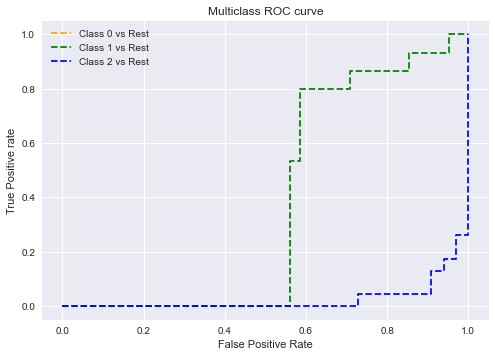

In [27]:
# plotting 
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);